In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import statsmodels.api as sm #unused
#import statsmodels.stats.diagnostic as smd #unused
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

dfMxPopulation = pd.read_csv('./csv/output.csv')
#dfPopTotalEst = pd.read_csv('./csv/Tabulado.csv')
#dfPopGrow = pd.read_csv('./csv/API_SP.POP.GROW_DS2_en_csv_v2_429579.csv')
#dfPopTotl = pd.read_csv('./csv/API_SP.POP.TOTL_DS2_en_csv_v2_422125.csv')
#dfPopTotlFem = pd.read_csv('./csv/API_SP.POP.TOTL.FE.IN_DS2_en_csv_v2_450007.csv')
#dfPopTotlMa = pd.read_csv('./csv/API_SP.POP.TOTL.MA.IN_DS2_en_csv_v2_423694.csv')

In [2]:
dfMxPopulation

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Mexico,MEX,Population growth (annual %),SP.POP.GROW,1.415823e+00,1.456208e+00,1.486064e+00,1.495369e+00,1.476758e+00,1.438142e+00,1.394793e+00,1.355289e+00,1.315561e+00,1.277676e+00,1.241178e+00,1.203251e+00,1.163968e+00,1.126421e+00
1,Mexico,MEX,"Population, total",SP.POP.TOTL,1.060052e+08,1.075602e+08,1.091705e+08,1.108153e+08,1.124639e+08,1.140930e+08,1.156955e+08,1.172742e+08,1.188272e+08,1.203551e+08,1.218583e+08,1.233334e+08,1.247773e+08,1.261908e+08
2,Mexico,MEX,"Population, female",SP.POP.TOTL.FE.IN,5.416835e+07,5.497186e+07,5.578902e+07,5.661502e+07,5.744295e+07,5.826718e+07,5.908605e+07,5.989883e+07,6.070189e+07,6.149130e+07,6.226408e+07,6.301802e+07,6.375282e+07,6.446997e+07
3,Mexico,MEX,"Population, male",SP.POP.TOTL.MA.IN,5.183685e+07,5.258830e+07,5.338148e+07,5.420026e+07,5.502094e+07,5.582578e+07,5.660943e+07,5.737532e+07,5.812527e+07,5.886383e+07,5.959417e+07,6.031536e+07,6.102450e+07,6.172082e+07


In [3]:
dfpopGrowAnual = dfMxPopulation.take([0])
dfpopGrowAnual

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Mexico,MEX,Population growth (annual %),SP.POP.GROW,1.415823,1.456208,1.486064,1.495369,1.476758,1.438142,1.394793,1.355289,1.315561,1.277676,1.241178,1.203251,1.163968,1.126421


In [4]:
aGrowAnual_col = dfpopGrowAnual.columns
aGrowAnual_col

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [5]:
nDecember = 12
nMarch = 3
aTrimesters = np.arange(3,15,3)
dfpopGrowTrimester = pd.DataFrame()
for column in aGrowAnual_col:
    # XO_dg: print(column)
    if column.isdigit():
        #add trimester columns
        for element in aTrimesters:
            if element == nDecember:
                dfpopGrowTrimester[column + str(element) + "01"] = np.nan
            elif element == nMarch:
                dfpopGrowTrimester[column + "0" + str(element) + "01"] = dfpopGrowAnual[column]
            else:
                dfpopGrowTrimester[column + "0" + str(element) + "01"] = np.nan                
                               
    else:
        dfpopGrowTrimester[column] = dfpopGrowAnual[column]
        #do nothing
dfpopGrowTrimester

,Country Name,Country Code,Indicator Name,Indicator Code,20050301,20050601,20050901,20051201,20060301,20060601,...,20160901,20161201,20170301,20170601,20170901,20171201,20180301,20180601,20180901,20181201
0,Mexico,MEX,Population growth (annual %),SP.POP.GROW,1.415823,NaN,NaN,NaN,1.456208,NaN,...,NaN,NaN,1.163968,NaN,NaN,NaN,1.126421,NaN,NaN,NaN


In [6]:
adrop_col = aGrowAnual_col[: 4]
dfpopGrowTrimester = dfpopGrowTrimester.drop(adrop_col, axis=1)
dfpopGrowTrimester

,20050301,20050601,20050901,20051201,20060301,20060601,20060901,20061201,20070301,20070601,...,20160901,20161201,20170301,20170601,20170901,20171201,20180301,20180601,20180901,20181201
0,1.415823,NaN,NaN,NaN,1.456208,NaN,NaN,NaN,1.486064,NaN,...,NaN,NaN,1.163968,NaN,NaN,NaN,1.126421,NaN,NaN,NaN


In [7]:
dfpopGrowTrimester_T = dfpopGrowTrimester.T
dfpopGrowTrimester_T.rename(columns={0: 'SP.POP.GROW'})

,SP.POP.GROW
20050301,1.415823
20050601,NaN
20050901,NaN
20051201,NaN
20060301,1.456208
20060601,NaN
20060901,NaN
20061201,NaN
20070301,1.486064
20070601,NaN


In [8]:
dfpopGrowTrimesterInterpolation = dfpopGrowTrimester_T.interpolate(method ='linear', limit_direction ='forward')
dfpopGrowTrimesterInterpolation.rename(columns={0: 'SP.POP.GROW'})
dfpopGrowTrimesterInterpolation

,0
20050301,1.415823
20050601,1.425919
20050901,1.436015
20051201,1.446111
20060301,1.456208
20060601,1.463672
20060901,1.471136
20061201,1.478600
20070301,1.486064
20070601,1.488391


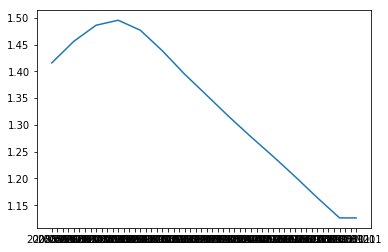

In [76]:
xAxis = np.asarray(dfpopGrowTrimesterInterpolation.index)
yData = np.asarray(dfpopGrowTrimesterInterpolation[0])
#print(xAxis)
#print(yData)
plt.plot(xAxis, yData)

In [105]:
#Get train data from 2005 to the last trimester of 2017
xTrainDataYear = xAxis[[np.arange(0, (xAxis.size-4), 1)]]
yTrainDataGrow = yData[[np.arange(0, (yData.size-4), 1)]]
regr = linear_model.LinearRegression()
regr.fit(xTrainDataYear, yTrainDataGrow)
#y_pred = regr.predict(xTrainDataYear)


ValueError: Expected 2D array, got 1D array instead:
array=[20050301. 20050601. 20050901. 20051201. 20060301. 20060601. 20060901.
 20061201. 20070301. 20070601. 20070901. 20071201. 20080301. 20080601.
 20080901. 20081201. 20090301. 20090601. 20090901. 20091201. 20100301.
 20100601. 20100901. 20101201. 20110301. 20110601. 20110901. 20111201.
 20120301. 20120601. 20120901. 20121201. 20130301. 20130601. 20130901.
 20131201. 20140301. 20140601. 20140901. 20141201. 20150301. 20150601.
 20150901. 20151201. 20160301. 20160601. 20160901. 20161201. 20170301.
 20170601. 20170901. 20171201.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#equation solved for logistic growth model N(t) = (N0*k)/(N0+(k-N0e^(-r*t))